In [3]:
import numpy as np
import pandas as pd

Storing file path in a variable for easy access

In [4]:
file_path = "../Data/Raw Data/titanic - titanic.csv"

In [5]:
#Original data will be stored in "Data" variable
Data = pd.read_csv(file_path)
#Copying data into "df" variable
df=Data
df = pd.DataFrame(df)
# We can use df.head() to see the data but we converted the data into dataframe thus we print df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Extracting column names from the dataset

In [6]:
column_names = df.columns.tolist()
column_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Converting all column names to lowercase

In [7]:
df_lower_cols = df.columns.str.lower()
df_lower_cols

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

Removing any special characters from the column names.

In [8]:
# There were no column names with special charecters so we inserted them
import random
special_chars = ['@', '#', '$', '%', '&', '*', '!', '?']
dfr=df
# Function to insert a random special character at a random position in a string
def insert_random_special_char(col_name):
    char = random.choice(special_chars)
    pos = random.randint(0, len(col_name))
    return col_name[:pos] + char + col_name[pos:]
# Apply to all column names
dfr.columns= [insert_random_special_char(col) for col in dfr.columns]
dfr.columns


Index(['PassengerI&d', '*Survived', '$Pclass', 'Name@', 'Sex!', '?Age',
       'Si$bSp', 'Pa@rch', 'Ti%cket', 'F&are', 'Cabin!', 'Embar#ked'],
      dtype='object')

In [9]:
dfr_remove_SC = dfr.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)
dfr.columns= dfr.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)
dfr_remove_SC

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking for missing values in the dataset

gathering the null values in form of 0's and 1's

In [10]:
# Here True(1) and False(0)
df.isna().astype(int)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,1,0,0,0,0,1,0
889,0,0,0,0,0,0,0,0,0,0,0,0


Treating or imputing missing values appropriately

In [11]:
print(df.isnull().sum())

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\lilha\AppData\Local\Temp\ipykernel_26968\2086390062.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\lilha\AppData\Local\Temp\ipykernel_26968\2086390062.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Visualizing cleaned data using a heatmap

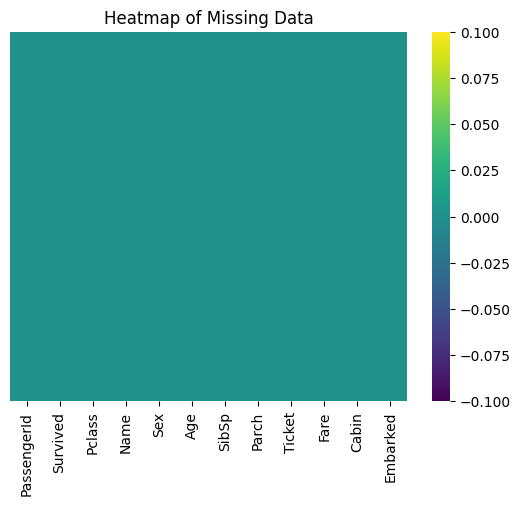

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna(), cmap='viridis', cbar=True, yticklabels=False)
# Add a title
plt.title('Heatmap of Missing Data')
# Show the plot
plt.show()

Visualizing missing data using a heatmap

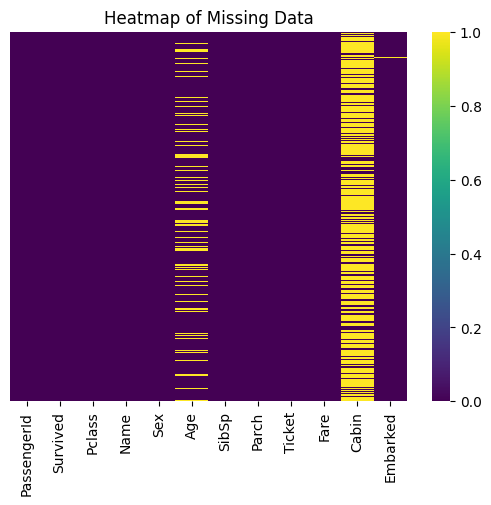

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv(file_path)
sns.heatmap(df1.isna(), cmap='viridis', cbar=True, yticklabels=False)
# Add a title
plt.title('Heatmap of Missing Data')
# Show the plot
plt.show()

Removing "Embarked" column because of no use and it also consist of NAN values

In [14]:
df = df.drop('Embarked', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148


Saving the cleaned and processed dataset for further use

In [15]:
df.to_csv("../Data/Cleaned Data/titanic - titanic.csv", index=False)

#Task 2

In [16]:
import janitor

In [25]:
Data2=pd.read_csv(file_path)

In [26]:
Data2 = (
    Data2
    .clean_names()  # converts to lowercase, snake_case, removes special characters and spaces
)

In [27]:
print("Cleaned Column Names:", Data2.columns.to_list())

Cleaned Column Names: ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [28]:
missing_summary = Data2.isna().sum()
print("\nMissing values per column:\n", missing_summary)


Missing values per column:
 passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


In [29]:
for col in Data2.columns:
    if Data2[col].dtype == 'float64' or Data2[col].dtype == 'int64':
        Data2[col].fillna(Data2[col].median(), inplace=True)
    else:
        Data2[col].fillna("Unknown", inplace=True)

C:\Users\lilha\AppData\Local\Temp\ipykernel_26968\2914206462.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data2[col].fillna(Data2[col].median(), inplace=True)
C:\Users\lilha\AppData\Local\Temp\ipykernel_26968\2914206462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2[col].fillna(Data2[col].median(), inplace=True)
C:\Users\lilh

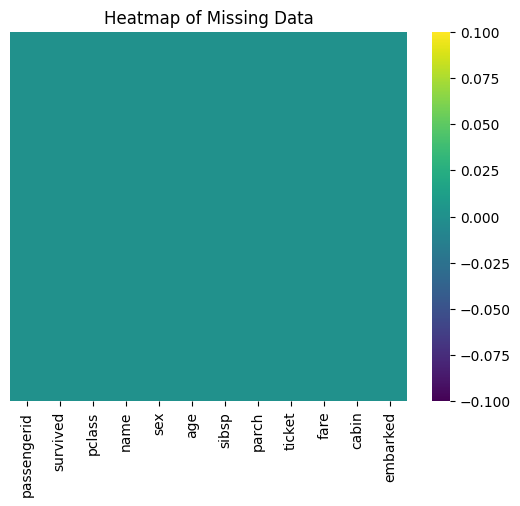

In [30]:
#plt.figure(figsize=(12, 6))
sns.heatmap(Data2.isna(), cbar=True, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.show()

In [33]:
Data2 = Data2.remove_columns(['embarked'])

c:\Users\lilha\OneDrive\Pictures\Desktop\5th-sem-Practicals\DA Practicals\VirtualEnviorment\Lib\site-packages\pandas_flavor\register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.drop` instead.
  return method(self._obj, *args, **kwargs)


In [32]:
Data2.to_csv("../Data/Cleaned Data/Task_2_titanic.csv", index=False)